In [153]:
# TODO TO FIX

In [154]:
from functions import *

In [155]:
params = read_parameters()
file_idx = params['file_idx']
tmp_idx = params['tmp_idx']

subfolder: UF/
file_idx: 0
tmp_idx: 0
initial_feed_volume_L: 100
reset_columns_when_OFF: True
drop_initial_final_off_rows: True
drop_off_rows: True
drop_outliers: True
plot_scatterplot_matrix: False
use_default_arima_params: True
default_arima_params: [1, 1, 0]
include_arima_simulations_in_analysis: True


In [156]:
# file_idx = 2
# tmp_idx  = 3

In [157]:
df = pd.read_csv(FILE_SENSORS_DATA_EST_PARAMS)

In [158]:
x_axis   = ('time [m]', 'datetime')
x_format = (None,       '%H:%M')
TIME_MINS = 0
DATE_TIME = 1
TIME_IDX  = TIME_MINS

In [159]:
FLUX_COL = 'flux at 20° [L/m^2h]' #'flux [L/m^2h]'
FLUX_USED = FLUX_COL[:-9]
FLUX_MIN_COL = f'{FLUX_USED} min [L/m^2h]'
print(FLUX_USED)

flux at 20°


In [160]:
coeff_flux_min   =      read_estimated_coefficients_from_json(FILE_EST_COEFFS, 'flux min')
coeff_flux_slope =      read_estimated_coefficients_from_json(FILE_EST_COEFFS, 'flux slope')
coeff_res_tot_initial = read_estimated_coefficients_from_json(FILE_EST_COEFFS, 'res tot [1/m]') 
coeff_prs_permeate =    read_estimated_coefficients_from_json(FILE_EST_COEFFS, 'prs permeate [kPa]') 

In [161]:
PRS_PERMEATE_EST = coeff_prs_permeate['intercept'] # constant value 
INITIAL_VISCOSITY = calc_viscosity(20, pressure_Pa=(101325+PRS_PERMEATE_EST), element='Water')
df['viscosity permeate at 20° [Pa s]'] = INITIAL_VISCOSITY
INITIAL_RESISTANCE = np.nan
if coeff_res_tot_initial['x'] == ['viscosity permeate [Pa s]'] :
    INITIAL_RESISTANCE = coeff_res_tot_initial['intercept'] + coeff_res_tot_initial['coefficients'][0] * INITIAL_VISCOSITY
else :
    print("ERROR: UPDATE INITIAL RESISTANCE FORMULA!")

In [162]:
INITIAL_ADDED = False
if INITIAL_ADDED :
    df = add_initial_flux(df, INITIAL_VISCOSITY)

In [163]:
# get the index of the first row of each setting
group_cols = ['file_idx', 'tmp_idx']
init_cond = list(df[group_cols].drop_duplicates().index)
df[[
    'file_idx', 'tmp_idx', 'date', 'time [m]',
    FLUX_COL, FLUX_MIN_COL, 'TMP est [kPa]',
    'viscosity permeate [Pa s]',  'initial feed concentration [g/L]'
    #'res tot est [%]', 'res tot est [1/m]', 'res tot est smooth [1/m]',
    #'retentate concentration est [g/L]',
    #'permeate concentration est [g/L]', 
]].loc[init_cond]

,file_idx,tmp_idx,date,time [m],flux at 20° [L/m^2h],flux at 20° min [L/m^2h],TMP est [kPa],viscosity permeate [Pa s]
0,0,0,2023-11-08,1.0,569.878476,516.555972,402.599676,0.001204
67,0,1,2023-11-08,1.0,486.872274,486.868903,383.741771,0.000989
118,0,2,2023-11-08,1.0,441.137629,438.354811,346.387036,0.000954
169,0,3,2023-11-08,1.0,367.919147,361.589805,289.723263,0.000870
220,0,4,2023-11-08,1.0,314.655442,310.187741,250.248126,0.000810
271,0,5,2023-11-08,1.0,221.602645,219.531488,180.095084,0.000766
322,0,6,2023-11-08,1.0,177.489806,174.500995,145.356988,0.000725
373,1,0,2023-11-09,1.0,183.442087,181.569014,148.334502,0.001027
424,2,0,2023-11-09,1.0,147.510234,120.701611,149.056304,0.000989
475,2,2,2023-11-09,1.0,145.794263,127.848726,188.666900,0.000960


In [164]:
df = df[(df['file_idx'] == file_idx) & (df['tmp_idx'] == tmp_idx)].reset_index(drop=True)
df = df.dropna(subset=[FLUX_COL], axis=0)
df[[
    'file_idx', 'tmp_idx', 'date', 'time [m]', 'is forecast',
    FLUX_COL, FLUX_MIN_COL, 'TMP est [kPa]',
    'viscosity permeate [Pa s]', 'initial feed concentration [g/L]'
]][:10]

,file_idx,tmp_idx,date,time [m],is forecast,flux at 20° [L/m^2h],flux at 20° min [L/m^2h],TMP est [kPa],viscosity permeate [Pa s],initial feed concentration [g/L]
0,2,3,2023-11-09,1.0,0.0,187.605822,148.308714,273.211327,0.000944,0.485017
1,2,3,2023-11-09,2.0,0.0,175.372659,148.308714,273.211327,0.000941,0.485017
2,2,3,2023-11-09,3.0,0.0,170.245760,148.308714,273.211327,0.000938,0.485017
3,2,3,2023-11-09,4.0,0.0,166.904595,148.308714,273.211327,0.000934,0.485017
4,2,3,2023-11-09,5.0,0.0,166.107217,148.308714,273.211327,0.000931,0.485017
5,2,3,2023-11-09,6.0,0.0,163.667526,148.308714,273.211327,0.000928,0.485017
6,2,3,2023-11-09,7.0,1.0,161.562251,148.308714,273.211327,0.000924,0.485017
7,2,3,2023-11-09,8.0,1.0,159.745551,148.308714,273.211327,0.000921,0.485017
8,2,3,2023-11-09,9.0,1.0,158.177872,148.308714,273.211327,0.000918,0.485017
9,2,3,2023-11-09,10.0,1.0,156.825078,148.308714,273.211327,0.000915,0.485017


(<Axes: xlabel='time [m]', ylabel='flux [LMH]'>,
 <Axes: title={'center': 'Flux and TMP over Time'}, ylabel='TMP [kPa]'>)

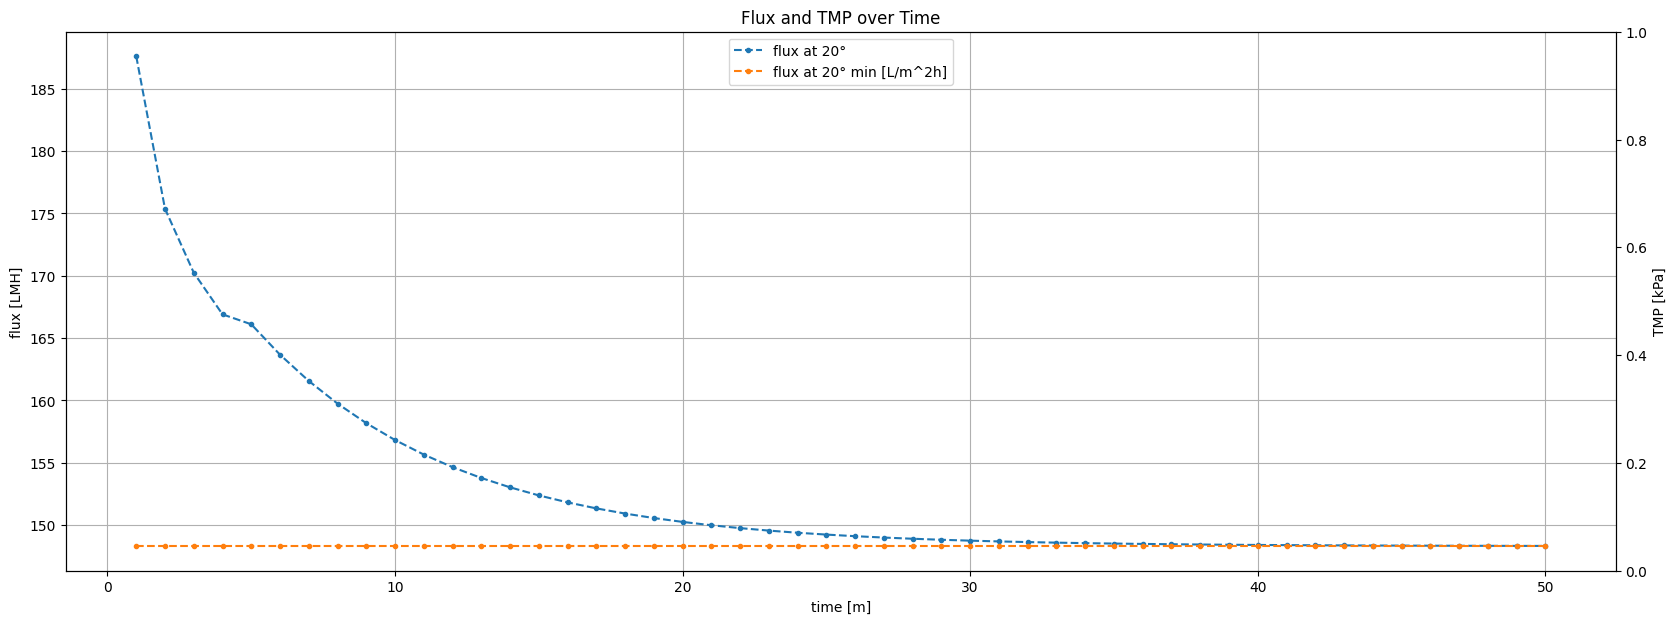

In [165]:
# STEP 1
# GOAL: 
# - find J_Re = flux asymptote (J_Re is a first estimate of J_R, the cross-flow removal term)
# - estimate initial flux J_0
# HOW: plot flux (J) vs filtration time (t)
y_dict = {
    #'flux' : df['flux [L/m^2h]'],
    'flux at 20°' : df['flux at 20° [L/m^2h]'],
    'flux at 20° min [L/m^2h]'  : df['flux at 20° min [L/m^2h]'],
}
y_ax_lbl = ['flux [LMH]', 'TMP [kPa]']
title    = 'Flux and TMP over Time'
#plot_time_series_1_axis(x=df[x_axis[TIME_IDX]], y_series=y_dict, x_ax_lbl=x_axis[TIME_IDX], y_ax_lbl=y_ax_lbl, title=title, x_format=x_format[TIME_IDX])
plot_time_series_2_axis(x=df[x_axis[TIME_IDX]], y_series=y_dict, x_ax_lbl=x_axis[TIME_IDX], y_ax_lbl=y_ax_lbl, title=title, x_format=x_format[TIME_IDX], secondary_y=['TMP est'], loc='upper center')

In [166]:
df.columns

Index(['file_idx', 'tmp_idx', 'date', 'time [m]', 'is forecast',
       'flux [L/m^2h]', 'flux at 20° [L/m^2h]', 'd/dt flux at 20°',
       'flux at 20° min [L/m^2h]', 'res tot est [1/m]',
       'res tot est at 20° [1/m]', 'TMP est [kPa]', 'increased TMP',
       'decreased TMP', 'viscosity permeate [Pa s]', 'k(n=0)', 'k(n=1)',
       'k(n=1.5)', 'k(n=2)', 'is flux at 20° steady',
       'initial feed concentration [g/L]',
       'initial retentate concentration [g/L]',
       'initial permeate concentration [g/L]', 'is TMP in [-inf, 100)',
       'is TMP in [100, 200)', 'is TMP in [200, 300)', 'is TMP in [300, 400)',
       'is TMP in [400, inf)', 'viscosity permeate at 20° [Pa s]'],
      dtype='object')

In [167]:
### FOUND PARAMETERS !!!!!!!!!!!!
J_0  = df.loc[0, FLUX_COL]
J_Re = df.loc[len(df)-1, FLUX_COL]
print(f"J_0  = {J_0:>.5f}")
print(f"J_Re = {J_Re:>.5f}")

J_0  = 187.60582
J_Re = 148.33211


In [168]:
df['J 20° - J_min 20°'] = df[FLUX_COL] - J_Re

In [169]:
display(df[[FLUX_COL, f'd/dt {FLUX_USED}', 'J 20° - J_min 20°', 'k(n=0)', 'k(n=1)', 'k(n=1.5)', 'k(n=2)', 'k(n=2)', 'is forecast']])

,flux at 20° [L/m^2h],d/dt flux at 20°,J 20° - J_min 20°,k(n=0),k(n=1),k(n=1.5),k(n=2),k(n=2),is forecast
0,187.605822,NaN,39.273708,NaN,NaN,NaN,NaN,NaN,0.0
1,175.372659,-12.233163,27.040545,0.000015,0.002000,0.034132,0.452010,0.452010,0.0
2,170.245760,-5.126899,21.913646,0.000008,0.001373,0.017912,0.233710,0.233710,0.0
3,166.904595,-3.341164,18.572482,0.000006,0.001076,0.013907,0.179672,0.179672,0.0
4,166.107217,-0.797378,17.775103,0.000002,0.000270,0.003476,0.044800,0.044800,0.0
5,163.667526,-2.439691,15.335412,0.000006,0.000971,0.012416,0.158846,0.158846,0.0
6,161.562251,-2.105276,13.230137,0.000006,0.000983,0.012497,0.158846,0.158846,1.0
7,159.745551,-1.816700,11.413437,0.000006,0.000994,0.012568,0.158846,0.158846,1.0
8,158.177872,-1.567679,9.845758,0.000006,0.001004,0.012630,0.158846,0.158846,1.0
9,156.825078,-1.352793,8.492965,0.000006,0.001013,0.012684,0.158846,0.158846,1.0


In [170]:
def fn(J, n, J_0) :
    if n == 0 : 
        return J.map(lambda j : (1 / j - 1 / J_0))
    if n == 1 :
        return J.map(lambda j : math.log(J_0 / j))
    if n == 1.5 :
        return J.map(lambda j : (math.sqrt(J_0) - math.sqrt(j)))
    if n == 2 :
        return J.map(lambda j : (J_0 - j))

In [171]:
AREA_TOT = 0.99

In [172]:
# recompute volume permeate
df['flow permeate [L/min]'] = (df[FLUX_COL] / 60) * AREA_TOT
df['delta vol permeate [L]'] = df['flow permeate [L/min]']
df.loc[0, 'delta vol permeate [L]'] = 0 #(J_0 / 60) * AREA_TOT 
df['vol permeate [L]'] = df['delta vol permeate [L]'].cumsum()
#for i in range(1, len(df)):
#    df.loc[i, 'vol permeate [L]'] = df.loc[i-1, 'vol permeate [L]'] + df.loc[i, 'delta vol permeate [L]']

In [173]:
# STEP 2
# GOAL: plot fn(J, n) vs (v − J_Re * t), with n = {0, 1, 1.5, 2}
# HOW:  generate time series (v − J_Re * t)
# Specific volume: v = VOL_PERMEATE ∕ AREA
df['v [L/m^2]'] = df['vol permeate [L]'] / AREA_TOT
# Real Flow * t - Minimum Flow * t = Real Volume Permeate - Minimum Volume Permeate
df['v - J_Re*t [L/m^2]'] = (df['v [L/m^2]'] - (J_Re/60 * df['time [m]']))

In [174]:
# STEP 3
# GOAL: check if any n fits the data otherwise find the inflection point
# HOW: plot fn(J, n) vs (v − J_Re * t), with n = {0, 1, 1.5, 2}
y_dict = {}
for n in [0, 1, 1.5, 2] :
    lbl = f'n={n}'
    col_name = f'f(J, n={n})'
    df[col_name] = fn(df[FLUX_COL], n, J_0)
    y_dict[lbl] = df[col_name]

In [175]:
#print(J_0, J_Re)
#df[['time [m]', 'flux [L/m^2h]', 'flow permeate [L/h]',
#       'vol permeate [L]', 'delta vol permeate [L]', 'v [L/m^2]',
#       'v - J_Re*t [L/m^2]', 'f(J, n=0)', 'f(J, n=1)', 'f(J, n=1.5)', 'f(J, n=2)']].head(10)

In [176]:
# TODO TO BE SET MANUALLY CHECKING THE CHART BELOW
inflection_point = 4

In [177]:
df.columns

Index(['file_idx', 'tmp_idx', 'date', 'time [m]', 'is forecast',
       'flux [L/m^2h]', 'flux at 20° [L/m^2h]', 'd/dt flux at 20°',
       'flux at 20° min [L/m^2h]', 'res tot est [1/m]',
       'res tot est at 20° [1/m]', 'TMP est [kPa]', 'increased TMP',
       'decreased TMP', 'viscosity permeate [Pa s]', 'k(n=0)', 'k(n=1)',
       'k(n=1.5)', 'k(n=2)', 'is flux at 20° steady',
       'initial feed concentration [g/L]',
       'initial retentate concentration [g/L]',
       'initial permeate concentration [g/L]', 'is TMP in [-inf, 100)',
       'is TMP in [100, 200)', 'is TMP in [200, 300)', 'is TMP in [300, 400)',
       'is TMP in [400, inf)', 'viscosity permeate at 20° [Pa s]',
       'J 20° - J_min 20°', 'flow permeate [L/min]', 'delta vol permeate [L]',
       'vol permeate [L]', 'v [L/m^2]', 'v - J_Re*t [L/m^2]', 'f(J, n=0)',
       'f(J, n=1)', 'f(J, n=1.5)', 'f(J, n=2)'],
      dtype='object')

f(J, n=0)
f(J, n=1)
f(J, n=1.5)
f(J, n=2)


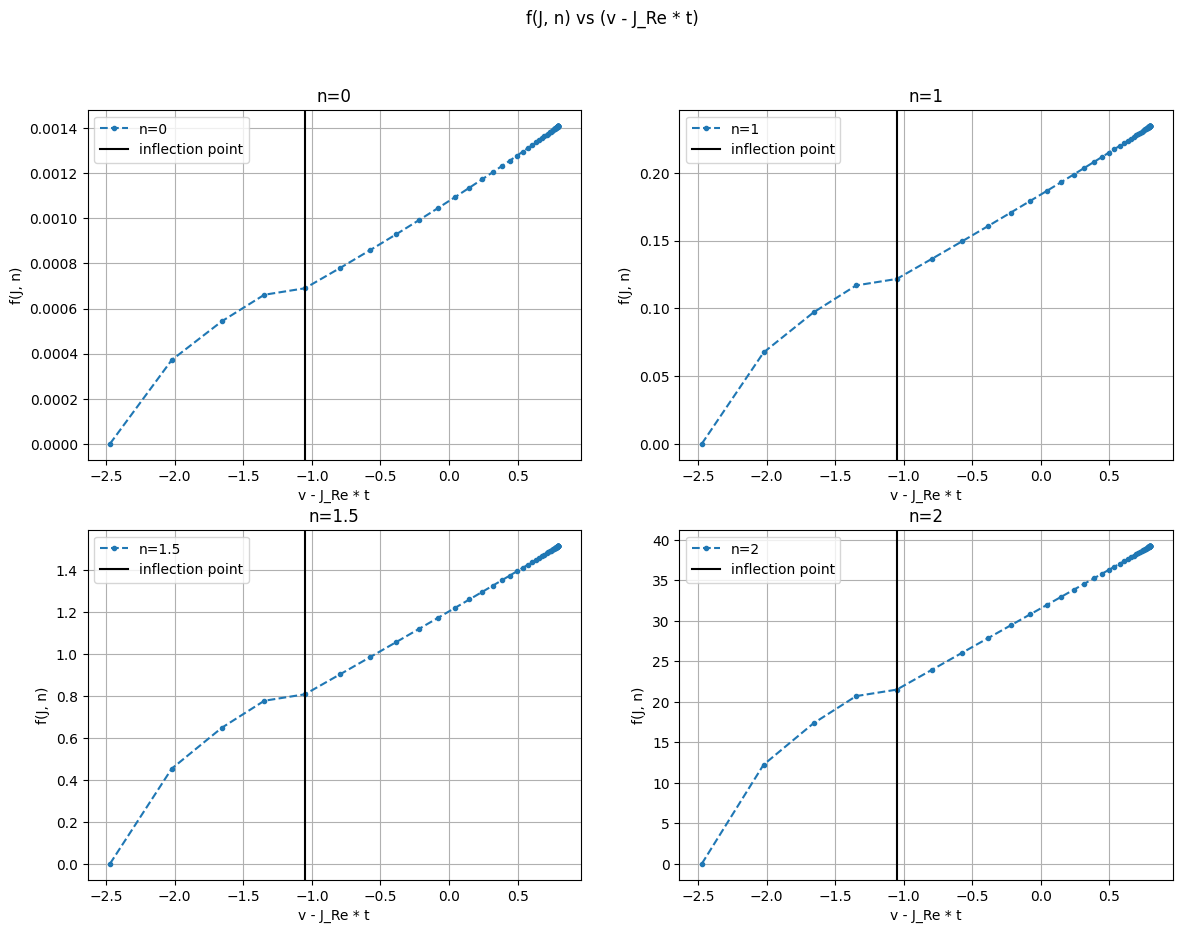

In [178]:
rows = 2
cols = 2
fig, axs = plot.subplots(rows, cols, figsize=(7*cols, 5*rows))
i = 0
j = 0
for (lbl, col) in y_dict.items() :
    print(f'f(J, {lbl})')
    y_dict_tmp = {}
    y_dict_tmp[lbl] = col
    #model, y_pred, intercept, coeffs = call_linear_model(df[['v - J_Re*t [L/m^2]']], col, summary=True)
    #y_dict_tmp[lbl + ' lm'] = y_pred
    idx = j if rows == 1 else (i, j)
    plot_time_series_1_axis(x=df['v - J_Re*t [L/m^2]'], y_series=y_dict_tmp, x_ax_lbl='v - J_Re * t', y_ax_lbl='f(J, n)', title=lbl, x_format=x_format[TIME_IDX], cur_ax=axs[idx])
    axs[idx].axvline(df.loc[inflection_point, 'v - J_Re*t [L/m^2]'], label='inflection point', color='black')
    
    j = (j + 1) % cols
    if j == 0 :
        i += 1
    axs[idx].legend()
plot.suptitle('f(J, n) vs (v - J_Re * t)')
plot.show()

In [179]:
# STEP 4.0
df['v / t [L/m^2*min]'] = df['v [L/m^2]'] / df['time [m]']
y_dict = {}
for n in [0, 1, 1.5, 2] :
    lbl = f'n={n}'
    col_name = f'f(J, n={n}) / t'
    print(col_name)
    df[col_name] = df[f'f(J, n={n})'] / df['time [m]']
    y_dict[lbl] = df[col_name]

f(J, n=0) / t
f(J, n=1) / t
f(J, n=1.5) / t
f(J, n=2) / t


In [180]:
def get__y_dict(df, f_col_name) :
    y_dict = {}
    for n in [0, 1, 1.5, 2] :
        col_name = f_col_name(n)
        y_dict[f'n={n}'] = df[col_name]
    return y_dict

In [181]:
# STEP 4
# GOAL: estimate n for data points 0 <= t <= inflection for the first phase of fouling
# HOW:  
# - plot (fn(J, n) / t) vs (v / t)
# - foreach couple(J,n) find (m,q) the best linear approximation
# n: y = m*x + q, where x = (v/t)
cur_df = df.loc[:inflection_point]
f_col_name = (lambda x : 'f(J, n=' + str(x) + ') / t')
y_dict = get__y_dict(cur_df, f_col_name)

Variance Inflation Factor (VIF)
 - The model has just one variable, v / t [L/m^2*min], thus there can't be multicollinerity.

Intercept:    2.3368055515954962e-05
Coefficients: [7.115228855704783e-05]
                            OLS Regression Results                            
Dep. Variable:          f(J, n=0) / t   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     7.732
Date:                Tue, 18 Jun 2024   Prob (F-statistic):             0.0689
Time:                        10:01:59   Log-Likelihood:                 43.992
No. Observations:                   5   AIC:                            -83.98
Df Residuals:                       3   BIC:                            -84.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
         

/opt/conda/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/conda/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/conda/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/opt/conda/lib/python3.11/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


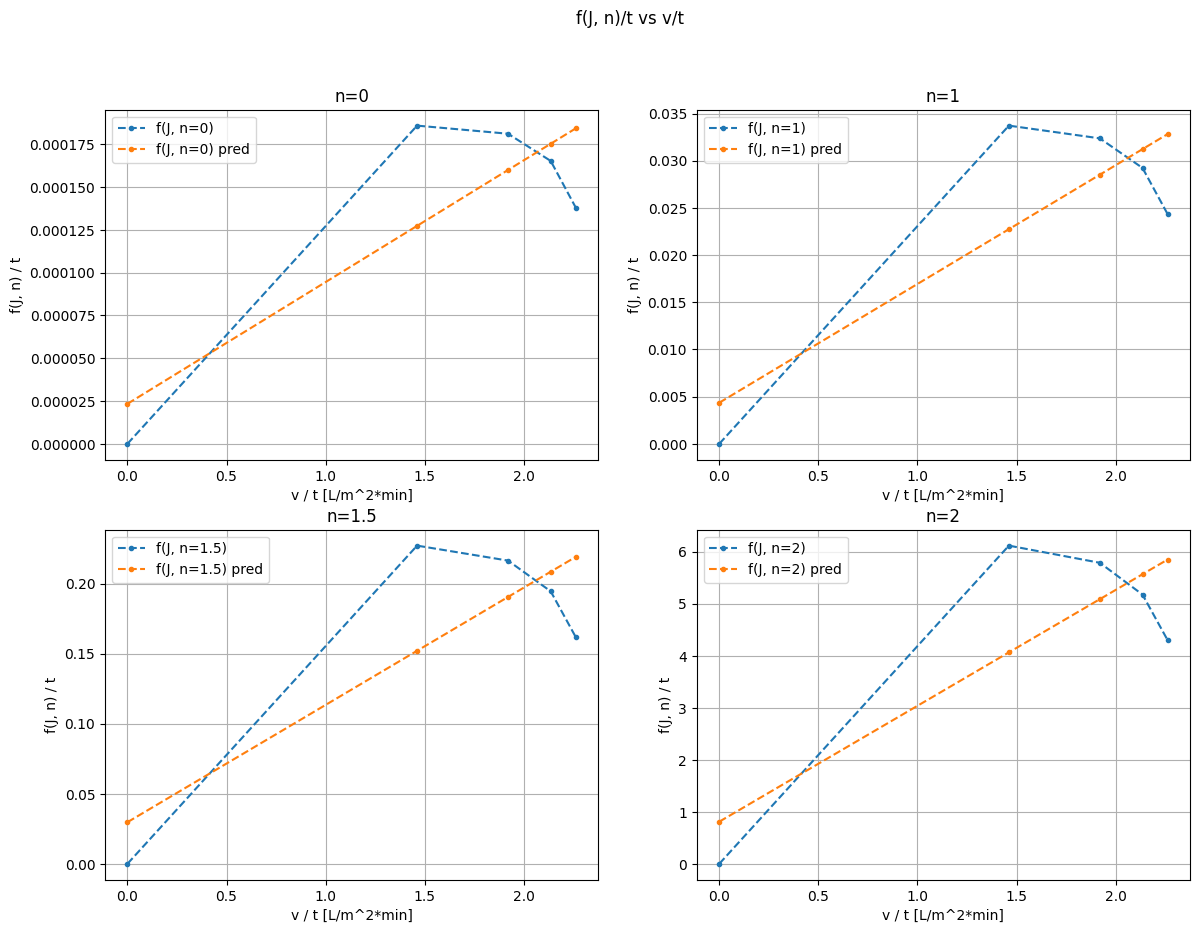

In [182]:
rows = 2
cols = 2
fig, axs = plot.subplots(rows, cols, figsize=(7*cols, 5*rows))
i = 0
j = 0
for (lbl, col) in y_dict.items() :
    y_dict_tmp = {}
    y_dict_tmp[f'f(J, {lbl})'] = col
    idx = j if rows == 1 else (i, j)
    x_cols = ['v / t [L/m^2*min]']
    x = cur_df[x_cols]
    y = col
    model, y_pred, intercept, coeffs = call_linear_model(x, y)
    df[f'f(J, {lbl}) pred'] = y_pred
    y_dict_tmp[f'f(J, {lbl}) pred'] = y_pred
    plot_time_series_1_axis(x=x, y_series=y_dict_tmp, x_ax_lbl='v / t [L/m^2*min]', y_ax_lbl='f(J, n) / t', title=lbl, x_format=x_format[TIME_IDX], cur_ax=axs[idx]) #color=[COLOR_CYCLE[i*cols+j]]
    j = (j + 1) % cols
    if j == 0 :
        i += 1
plot.suptitle('f(J, n)/t vs v/t')
plot.show()

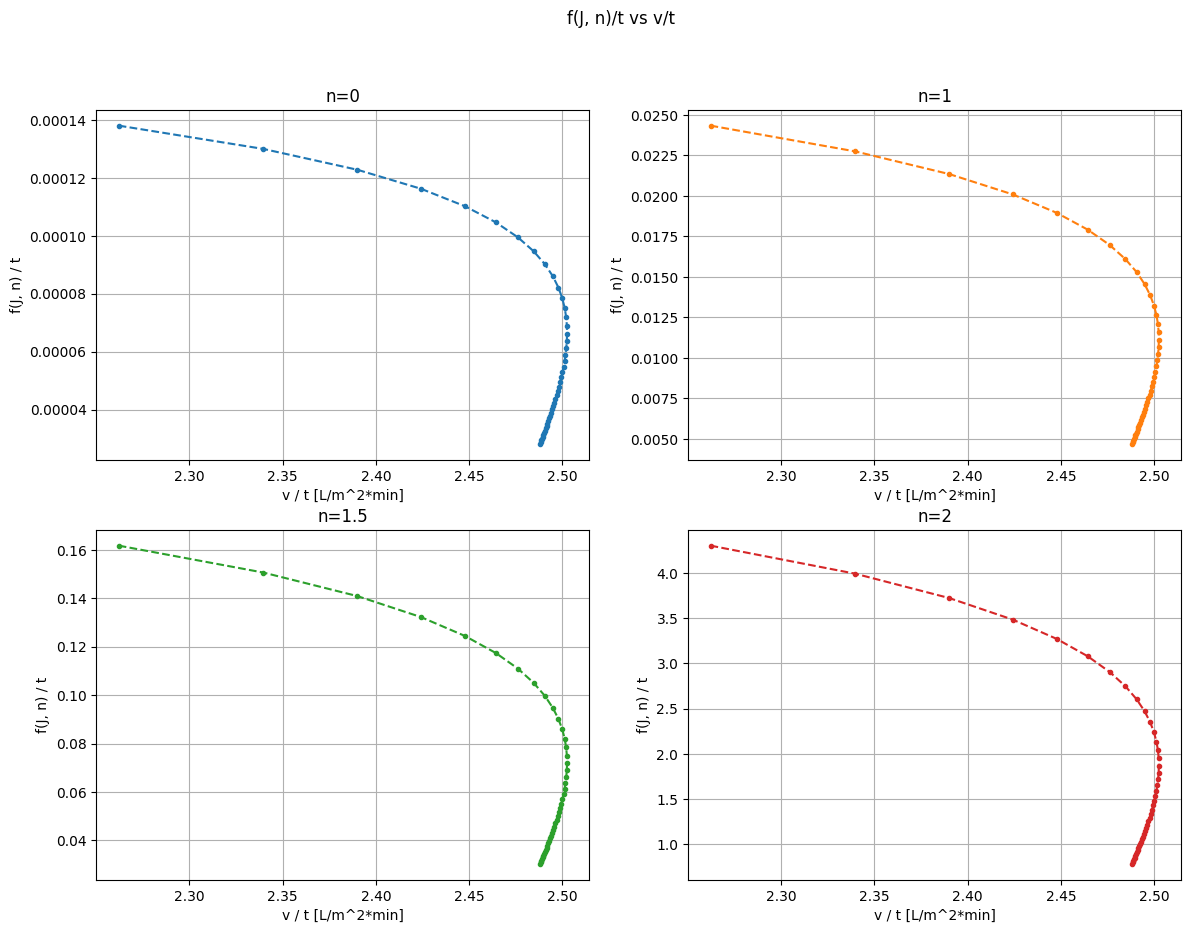

In [183]:
# STEP 5
# GOAL: estimate n for data points inflection <= t <= +inf for the second phase of fouling
# HOW:
# - plot (fn(J, n) / t) vs (v / t)
# - foreach couple(J,n) find (m,q) the best linear approximation: y = m*x + q, where x = (v/t)
cur_df = df.loc[inflection_point:]
f_col_name = (lambda x : 'f(J, n=' + str(x) + ') / t')
y_dict = get__y_dict(cur_df, f_col_name)
rows = 2
cols = 2
fig, axs = plot.subplots(rows, cols, figsize=(7*cols, 5*rows))
i = 0
j = 0
for (lbl, col) in y_dict.items() :
    y_dict_tmp = {}
    y_dict_tmp[lbl] = col
    idx = j if rows == 1 else (i, j)
    plot_time_series_1_axis(x=cur_df['v / t [L/m^2*min]'], y_series=y_dict_tmp, x_ax_lbl='v / t [L/m^2*min]', y_ax_lbl='f(J, n) / t', title=lbl, x_format=x_format[TIME_IDX], cur_ax=axs[idx], color=[COLOR_CYCLE[i*cols+j]])
    j = (j + 1) % cols
    if j == 0 :
        i += 1
plot.suptitle('f(J, n)/t vs v/t')
plot.show()

In [184]:
# f(n) / t = K_n v / t − K_n * J_R ==> # f(n) = t * (K_n v / t − K_n * J_R) = K_n * (v - J_R * t)

def rhs(v, t, K_n, J_R) :
    return K_n * (v - J_R * t)

def estimate_flux(n, v, t, K_n, J_R, J_0) :
    val =  rhs(v, t, K_n, J_R)
    if n == 0 : 
        return 1 / (val + (1 / J_0))
    if n == 1 :
        return math.exp(math.log(J_0) - val)
    if n == 1.5 :
        # J_R is expected to be 0
        return (val - J_0) ** 2
    if n == 2 :
        return J_0 - val

In [185]:
# STEP 6
# GOAL: optimise the estimated parameter values in order to obtain the expressions for flux as a function of time
# HOW: TODO
# CHECK ESTIMATIONS VS REAL FLUX
df['estimated flux [L/m^2h]'] = estimate_flux(n, v, t, K_n, J_R, J_0)
plot_time_series(x=cur_df['v / t'], y_series=y_dict, x_lbl='(v / t)', y_lbl='f(J, n) / t', title='(f(J, n) / t) vs (v / t)')

NameError: name 'v' is not defined